In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

plt.style.use('ggplot')
plt.rcParams.update({'font.size':15})

%matplotlib inline

# ヒストグラム（Histogram）
**特徴**  
**単一の変数についての分布がわかる**  
  
一つのグラフに複数のヒストグラムをプロットすると理解しづらくなるため，サブプロットの使用を推奨．  
ヒストグラムをプロットする際はbinを指定する必要がある． binの区切り方によってはだいぶ印象が変わるため，binを色々と変更してみると良い．  

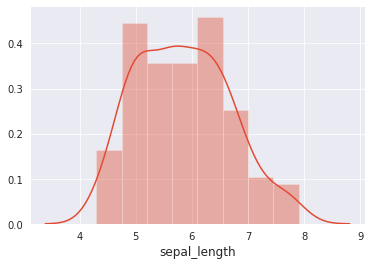

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_style('darkgrid')

df = sns.load_dataset('iris')

sns.distplot(df["sepal_length"])
plt.show()

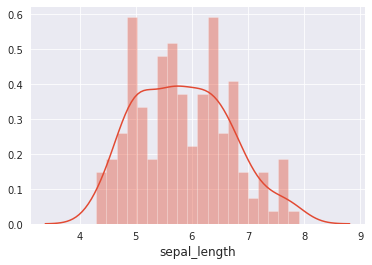

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_style('darkgrid')

df = sns.load_dataset('iris')

sns.distplot(df["sepal_length"], bins=20)
plt.show()

**累積ヒストグラム（Stacked Histogram）**

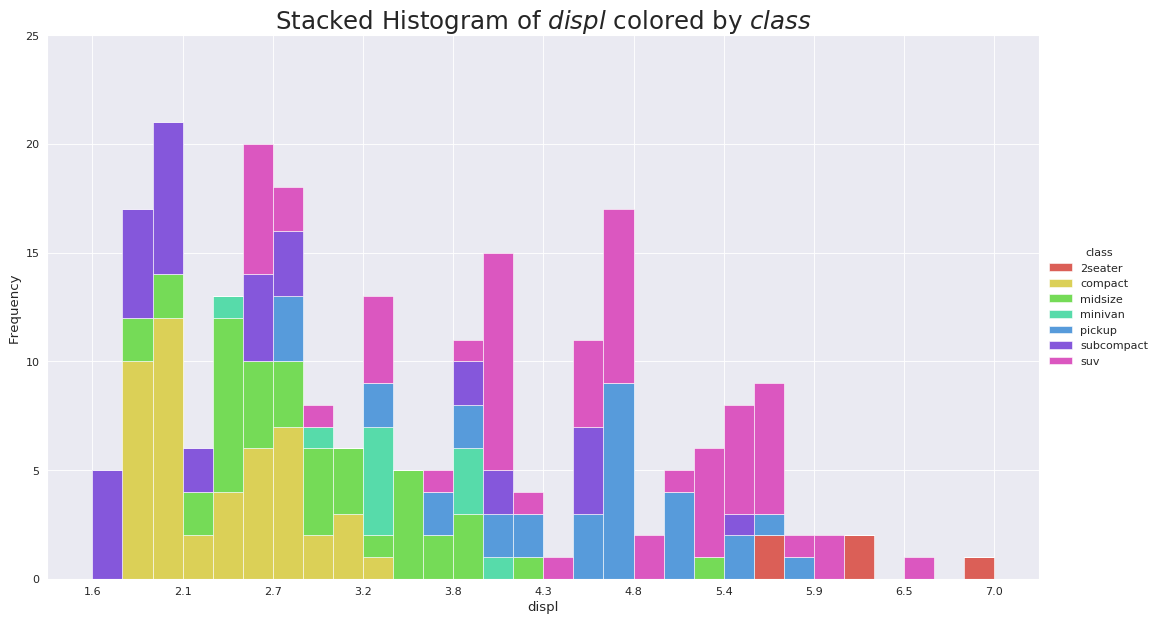

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_style('darkgrid')

df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

x_var, groupby_var = 'displ', 'class'
df_agg = df.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [df[x_var].values.tolist() for i, df in df_agg]

plt.figure(figsize=(16,9), dpi=80)
colors = sns.color_palette("hls", len(vals))
n, bins, patches = plt.hist(vals, 30, stacked=True, density=False, color=colors[:len(vals)])

plt.legend(
    {group:col for group, col in zip(np.unique(df[groupby_var]).tolist(), colors[:len(vals)])},
    title=groupby_var,
    loc='center left',
    bbox_to_anchor=(1, .5),
    facecolor='white',
    frameon=False)
plt.title(f"Stacked Histogram of ${x_var}$ colored by ${groupby_var}$", fontsize=22)
plt.xlabel(x_var)
plt.ylabel("Frequency")
plt.ylim(0, 25)
plt.xticks(ticks=bins[::3], labels=[round(b,1) for b in bins[::3]])
plt.show()

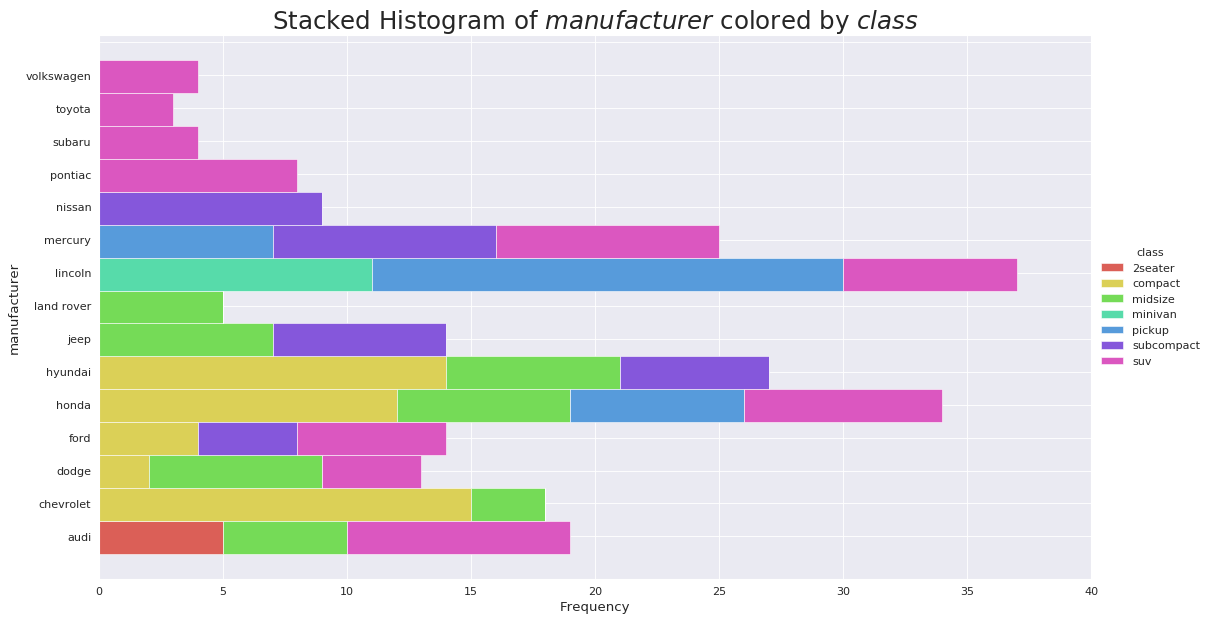

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_style('darkgrid')

df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

x_var, groupby_var = 'manufacturer', 'class'
df_agg = df.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [df[x_var].values.tolist() for i, df in df_agg]

plt.figure(figsize=(16,9), dpi=80)
colors = sns.color_palette("hls", len(vals))
n, bins, patches = plt.hist(
    vals, df[x_var].unique().__len__(),
    stacked=True,
    density=False,
    orientation='horizontal',
    color=colors[:len(vals)])

plt.legend(
    {group:col for group, col in zip(np.unique(df[groupby_var]).tolist(), colors[:len(vals)])},
    loc='center left',
    title=groupby_var,
    bbox_to_anchor=(1, .5),
    facecolor='white',
    frameon=False)
plt.title(f"Stacked Histogram of ${x_var}$ colored by ${groupby_var}$", fontsize=22)
plt.xlabel("Frequency")
plt.ylabel(x_var)
plt.xlim(0, 40)
plt.xticks(
    ticks=np.arange(0, 41, 5),
    labels=[str(n) for n in np.arange(0, 41, 5)])
plt.yticks(
    ticks=bins+0.5,
    labels=np.unique(df[x_var]).tolist())
plt.show()

**累積したヒストグラムよりも，基本指針に従って各ラベルごとにプロットしたほうが見やすい．**

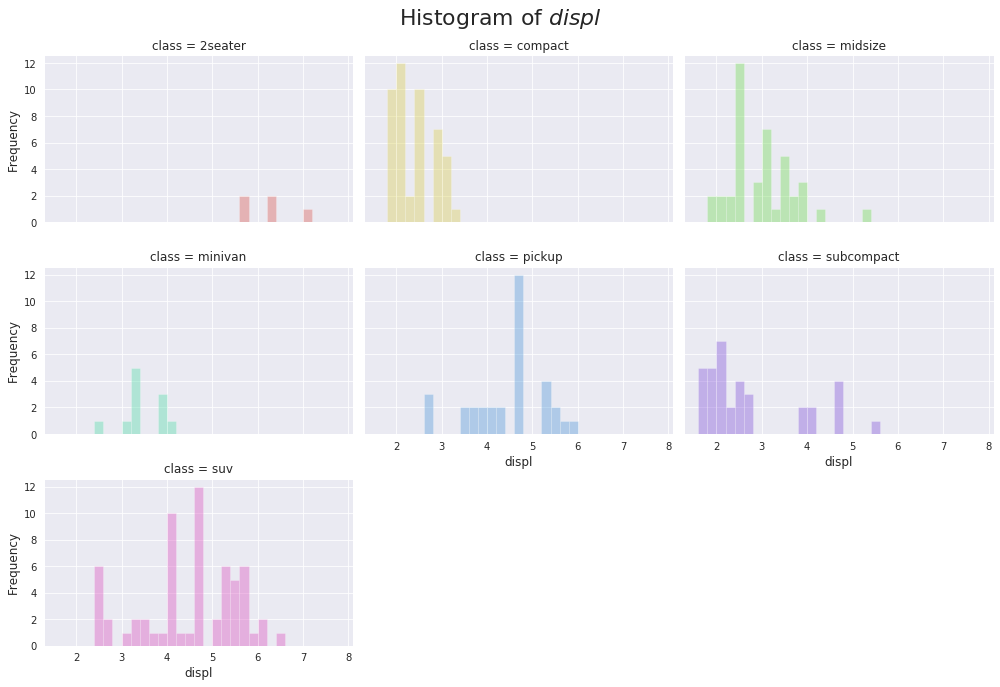

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_style('darkgrid')

df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

x_var, groupby_var = 'displ', 'class'
df_agg = df.loc[:, [x_var, groupby_var]].groupby(groupby_var)

classes = np.unique(df[groupby_var]).tolist()
global_min, global_max = df[x_var].min(), df[x_var].max()

nr, nc = 3, 3
x, y = 0, 0
fig, ax = plt.subplots(nrows=nr, ncols=nc, sharex=True, sharey=True, figsize=(14, 10))
for i, c in enumerate(classes):
    x = x + 1 if i > 0 and i % nc == 0 else x
    y = i % nc

    vals = df_agg.get_group(c)[x_var].values
    sns.distplot(
        vals,
        bins=np.arange(global_min, global_max+1, 0.2),
        color=sns.color_palette("hls", len(classes))[i],
        kde=False,
        rug=False,
        ax=ax[x, y])

    if i >= len(classes) - nr:
        ax[x, y].tick_params(labelbottom=True)
        ax[x, y].set_xlabel(x_var, fontsize=12)
    if y==0:
        ax[x, y].set_ylabel('Frequency', fontsize=12)

    ax[x, y].tick_params(labelsize=10)
    ax[x, y].set_title(groupby_var + ' = ' + c, fontsize=12)

if i < nr * nc:
    for i in range(i+1, nr*nc):
        x = x + 1 if i > 0 and i % nc == 0 else x
        y = i % nc

        fig.delaxes(ax[x, y])

fig.suptitle(f"Histogram of ${x_var}$", fontsize=22)
fig.tight_layout(
    rect=[
        0, # left
        0.03, # bottom
        1, # right
        0.95 # top
    ]
)
fig.show()

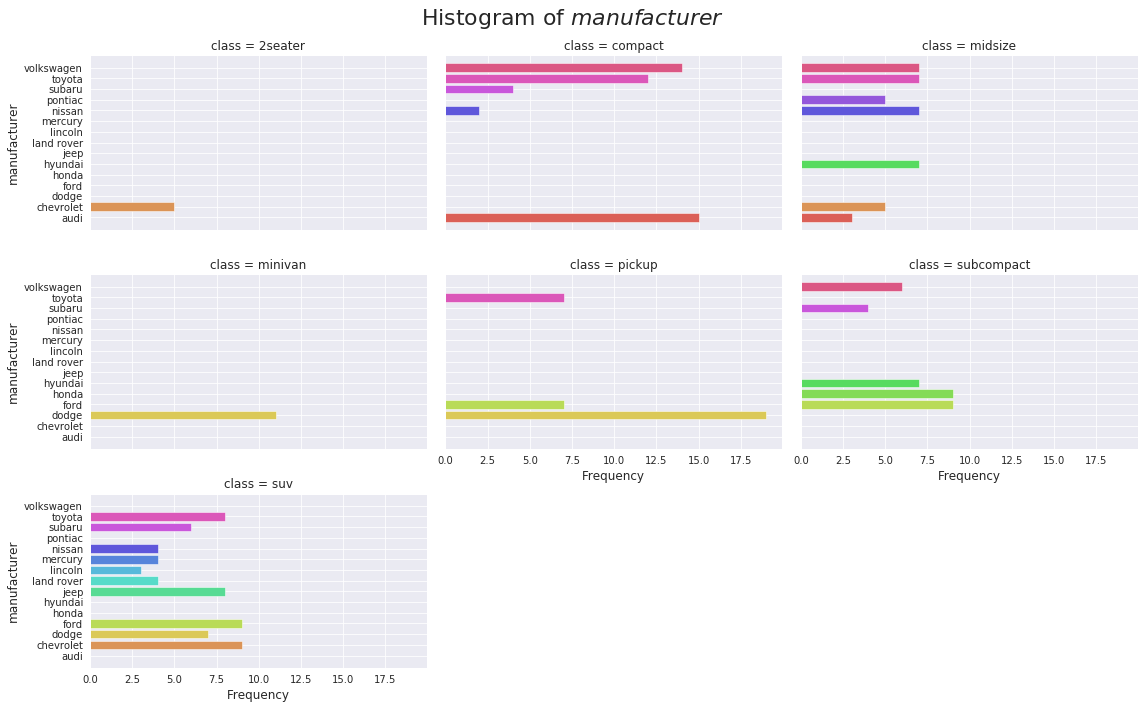

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_style('darkgrid')

df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

x_var, groupby_var = 'manufacturer', 'class'
df_agg = df.loc[:, [x_var, groupby_var]].groupby(groupby_var)

# 足りない分を埋める
df_count = df_agg[x_var].value_counts().reset_index(name='Frequency')
all_m = set(np.unique(df_count.manufacturer))
for c in classes:
    current_m = set(df_count[df_count[groupby_var]==c][x_var].values)
    diff = all_m.difference(current_m)
    for d in diff:
        s = pd.Series([c, d, 0], index=[groupby_var, x_var, 'Frequency'])
        df_count = df_count.append(s, ignore_index=True)
df_count = df_count.sort_values(by=[groupby_var, x_var])

u_x_var = np.unique(df_count.manufacturer)
n_u_x_var = len(u_x_var)
r = np.arange(1, n_u_x_var+1)

classes = np.unique(df_count[groupby_var])
nr, nc = 3, 3
x, y = 0, 0
fig, ax = plt.subplots(nrows=nr, ncols=nc, sharex=True, sharey=True, figsize=(16, 10))
for i, c in enumerate(classes):
    x = x + 1 if i > 0 and i % nc == 0 else x
    y = i % nc

    ax[x, y].barh(
        y=r,
        width=df_count[df_count[groupby_var]==c]['Frequency'],
        color=sns.color_palette("hls", n_u_x_var))

    if i >= len(classes) - nr:
        ax[x, y].tick_params(labelbottom=True)
        ax[x, y].set_yticks(np.arange(1, n_u_x_var+1), minor=False)
        ax[x, y].set_yticklabels(u_x_var)
        ax[x, y].set_ylabel(x_var, fontsize=12)
        ax[x, y].set_xlabel('Frequency', fontsize=12)
    else:
        ax[x, y].set_xlabel('')
    if y==0:
        ax[x, y].set_ylabel(x_var, fontsize=12)
    if y != 0:
        ax[x, y].set_ylabel('')

    ax[x, y].tick_params(labelsize=10)
    ax[x, y].set_title(groupby_var + ' = ' + c, fontsize=12)

if i < nr * nc:
    for i in range(i+1, nr*nc):
        x = x + 1 if i > 0 and i % nc == 0 else x
        y = i % nc

        fig.delaxes(ax[x, y])


fig.suptitle(f"Histogram of ${x_var}$", fontsize=22)
fig.tight_layout(
    rect=[
        0, # left
        0, # bottom
        1, # right
        0.95 # top
    ]
)
fig.show()

# 密度プロット（Density Plot）  
**特徴**  
**このグラフもヒストグラムと同様に単変量の分布を表現できる．**  
ヒストグラムと同様にバンド幅を色々と変更すると，印象が変わる  
１つのプロットに複数の密度プロットを示すと理解しづらくなるので，サブプロットを使用するべき  

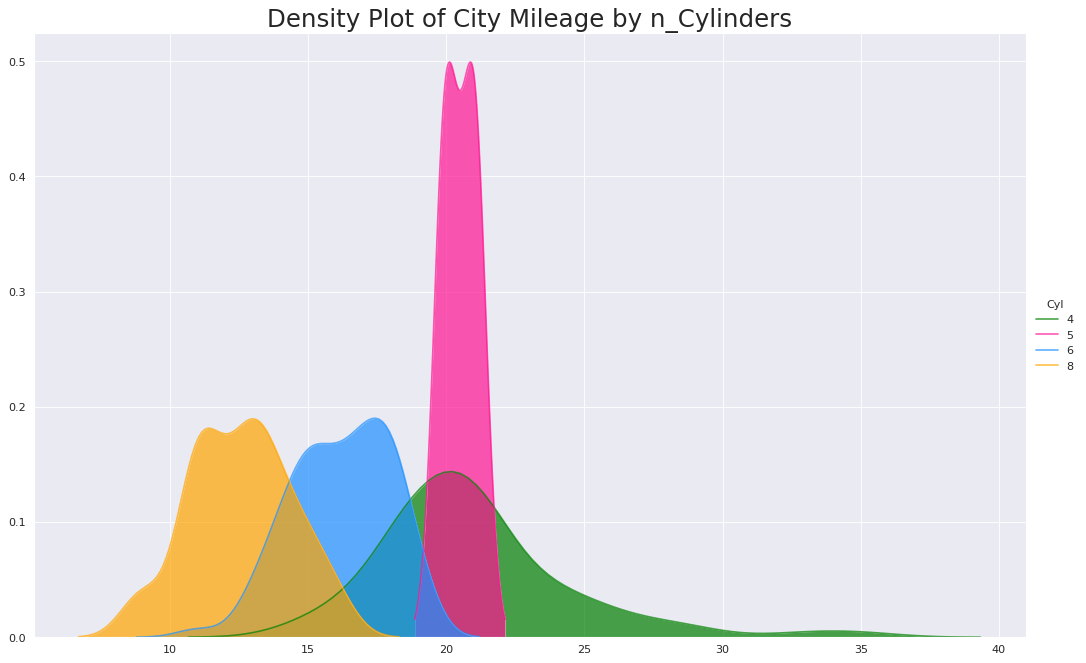

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_style('darkgrid')

df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

colors = ['g', 'deeppink', 'dodgerblue', 'orange']
plt.figure(figsize=(16,10), dpi=80)
sns.kdeplot(df.loc[df['cyl'] == 4, "cty"], shade=True, color=colors[0], label="4", alpha=.7)
sns.kdeplot(df.loc[df['cyl'] == 5, "cty"], shade=True, color=colors[1], label="5", alpha=.7)
sns.kdeplot(df.loc[df['cyl'] == 6, "cty"], shade=True, color=colors[2], label="6", alpha=.7)
sns.kdeplot(df.loc[df['cyl'] == 8, "cty"], shade=True, color=colors[3], label="8", alpha=.7)

plt.title('Density Plot of City Mileage by n_Cylinders', fontsize=22)
plt.legend(
    title='Cyl',
    loc='center left',
    bbox_to_anchor=(1, .5),
    facecolor='white',
    frameon=False)
plt.show()

IndexError: list index out of range

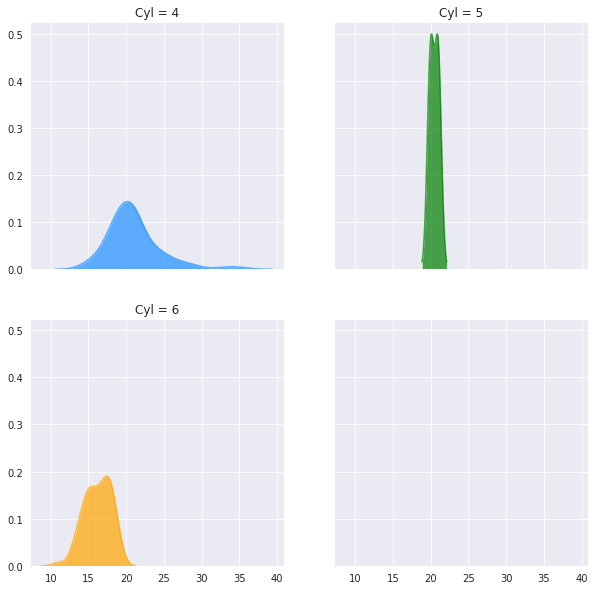

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_style('darkgrid')

df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

nr, nc = 2, 2
colors = ['dodgerblue', 'g', 'orange']
fig, ax = plt.subplots(nrows=nr, ncols=nc, sharex=True, sharey=True, figsize=(10, 10))
x, y = 0, 0
for i, cyl in enumerate([4, 5, 6, 8]):
    x = x + 1 if i > 0 and i % nc == 0 else x
    y = i % nc

    sns.kdeplot(df.loc[df['cyl'] == cyl, "cty"], shade=True, alpha=.7, color=colors[i], ax=ax[x, y])

    ax[x, y].set_title("Cyl = "+str(cyl), fontsize=12)
    ax[x, y].legend('', frameon=False)

fig.suptitle('Density Plot of City Mileage by n_Cylinders', fontsize=22)
fig.tight_layout(
    rect=[
        0, # left
        0, # bottom
        1, # right
        0.95 # top
    ]
)
fig.show()

**密度プロット+ヒストグラム**

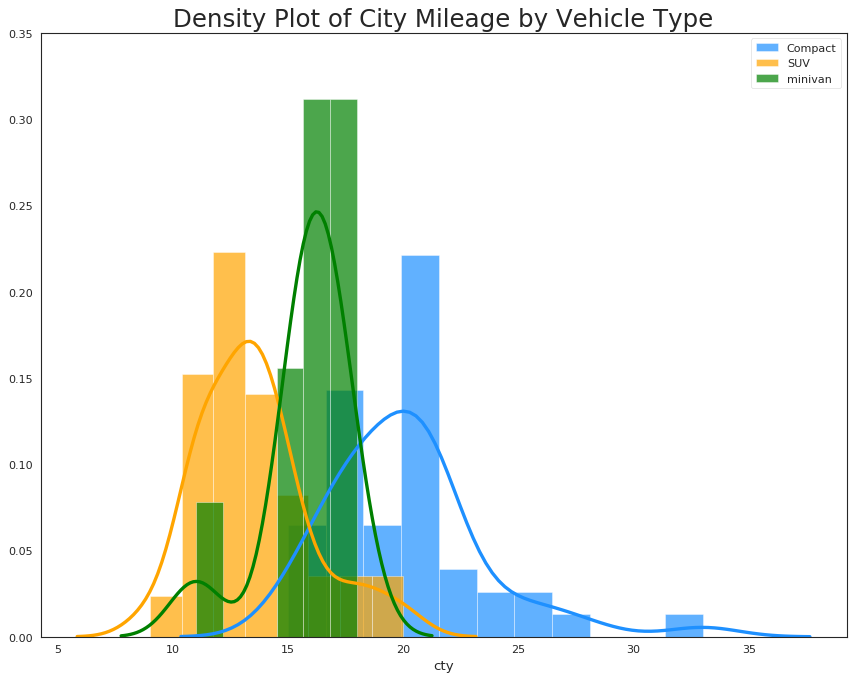

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_style('white')

df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

# Draw Plot
plt.figure(figsize=(13,10), dpi=80)
sns.distplot(df.loc[df['class'] == 'compact', "cty"], color="dodgerblue", label="Compact", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
sns.distplot(df.loc[df['class'] == 'suv', "cty"], color="orange", label="SUV", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
sns.distplot(df.loc[df['class'] == 'minivan', "cty"], color="g", label="minivan", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
plt.ylim(0, 0.35)

# Decoration
plt.title('Density Plot of City Mileage by Vehicle Type', fontsize=22)
plt.legend()
plt.show()

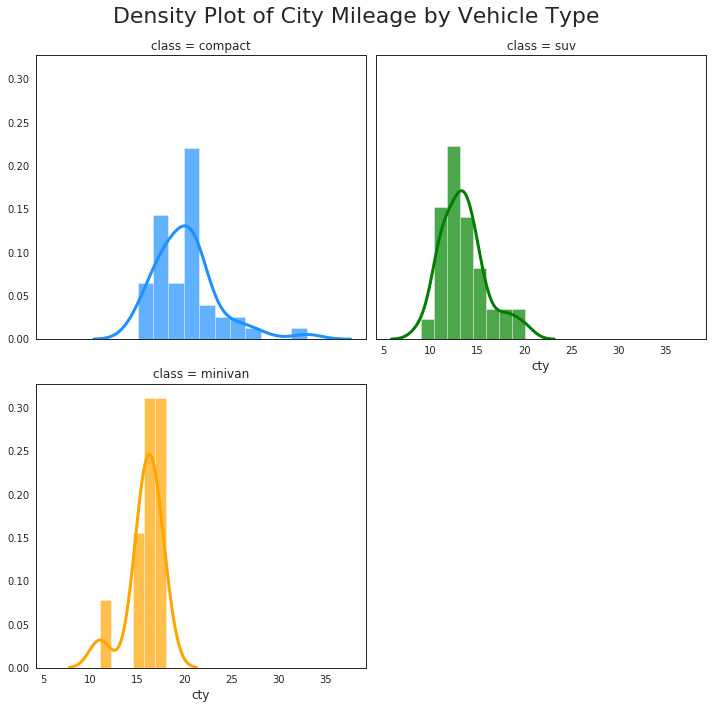

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_style('white')

df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

colors = ['dodgerblue', 'g', 'orange']

nr, nc = 2, 2
fig, ax = plt.subplots(nrows=nr, ncols=nc, sharex=True, sharey=True, figsize=(10, 10))
x, y = 0, 0
classes = ['compact', 'suv', 'minivan']
for i, c in enumerate(classes):
    x = x + 1 if i > 0 and i % nc == 0 else x
    y = i % nc

    sns.distplot(df.loc[df['class'] == c, "cty"], label=c, hist_kws={'alpha':.7}, kde_kws={'linewidth':3}, ax=ax[x, y], color=colors[i])

    if i >= len(classes) - nr:
        ax[x, y].tick_params(labelbottom=True)
        ax[x, y].set_xlabel('cty', fontsize=12)
    else:
        ax[x, y].set_xlabel('')

    ax[x, y].tick_params(labelsize=10)
    ax[x, y].set_title('class = ' + c, fontsize=12)

if i < nr * nc:
    for i in range(i+1, nr*nc):
        x = x + 1 if i > 0 and i % nc == 0 else x
        y = i % nc

        fig.delaxes(ax[x, y])

fig.suptitle('Density Plot of City Mileage by Vehicle Type', fontsize=22)
fig.tight_layout(
    rect=[
        0, # left
        0, # bottom
        1, # right
        0.95 # top
    ]
)
fig.show()

# 箱ひげ図（Box Plot）
**特徴**  
**箱ひげ図はある変数の分布を表すのに向いている．**  
**ヒストグラムや密度プロットと違い，箱ひげ図は複数の変数を扱うことができる．**   

**箱ひげ図の中央の線はその変数の中央値を表している．**  
**箱の上部と下部はそれぞれ75%tile，25%tileの数値を表している．**  
**箱から伸びている線に収まっていない点は外れ値としてみなす．**  

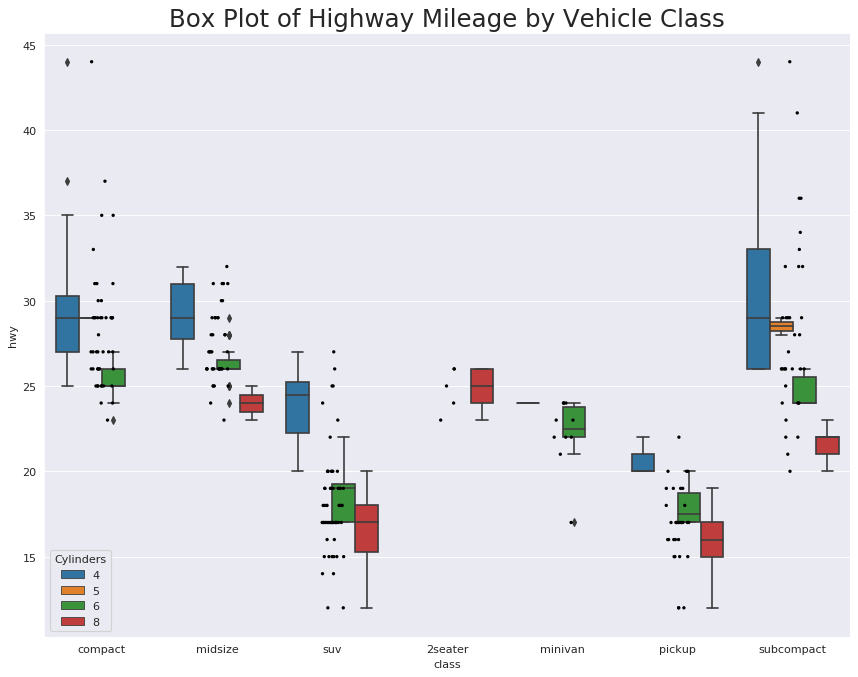

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_style('darkgrid')

df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

plt.figure(figsize=(13,10), dpi=80)
sns.boxplot(x='class', y='hwy', data=df, hue='cyl')
sns.stripplot(x='class', y='hwy', data=df, color='black', size=3, jitter=1)

plt.title('Box Plot of Highway Mileage by Vehicle Class', fontsize=22)
plt.legend(title='Cylinders')
plt.show()

注意点  
箱ひげ図では分布がわからないので，サンプル数が少なければジッター or スウォームプロット，多ければバイオリンプロットを使うと良い．  
中央値順に並べるとインサイトを生みやすい．  
箱ひげ図はサンプル数がわからなくなってしまうため，プロットに示しておくのが親切．  

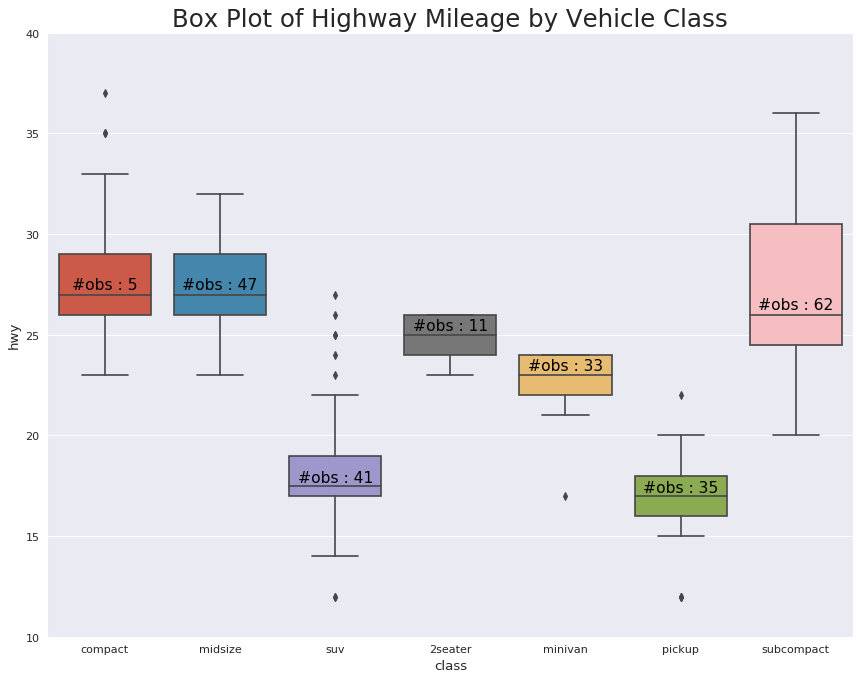

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_style('darkgrid')

df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

plt.figure(figsize=(13,10), dpi=80)
sns.boxplot(x='class', y='hwy', data=df, notch=False)

def add_n_obs(df,group_col,y):
    medians_dict = {grp[0]:grp[1][y].median() for grp in df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = df.groupby(group_col)[y].size().values
    for (x, xticklabel), n_ob in zip(enumerate(xticklabels), n_obs):
        plt.text(x, medians_dict[xticklabel]*1.01, "#obs : "+str(n_ob), horizontalalignment='center', fontdict={'size':14}, color='black')

add_n_obs(df, group_col='class', y='hwy')

plt.title('Box Plot of Highway Mileage by Vehicle Class', fontsize=22)
plt.ylim(10, 40)
plt.show()

# バイオリンプロット（Violin Plot）
**特徴**  
**バイオリンプロットは箱ひげ図とよく似ているが，箱ひげ図と違い分布がわかる．**  
**バイオリンプロットはデータ数が多く個々のデータ点を観測できないときによく使用される．**  

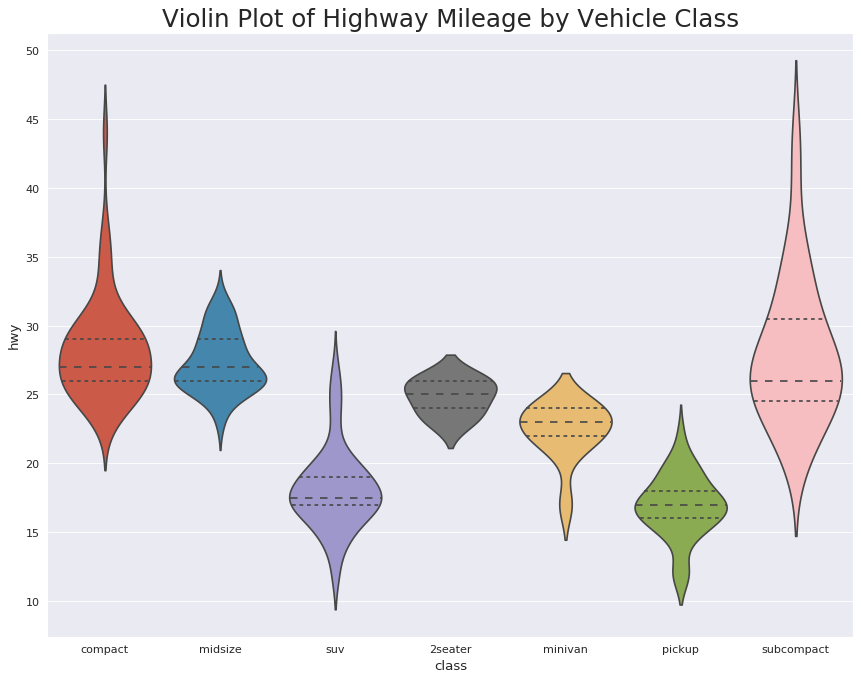

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_style('darkgrid')

df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

plt.figure(figsize=(13,10), dpi=80)
sns.violinplot(x='class', y='hwy', data=df, scale='width', inner='quartile')

plt.title('Violin Plot of Highway Mileage by Vehicle Class', fontsize=22)
plt.show()

注意点  
グループ数が少ないのであればリッジラインも良い．  
グループ毎にサンプル数が異なる場合は，サンプル数をそれぞれプロットするべき．  
中央値順に並べるとインサイトを生みやすい．  

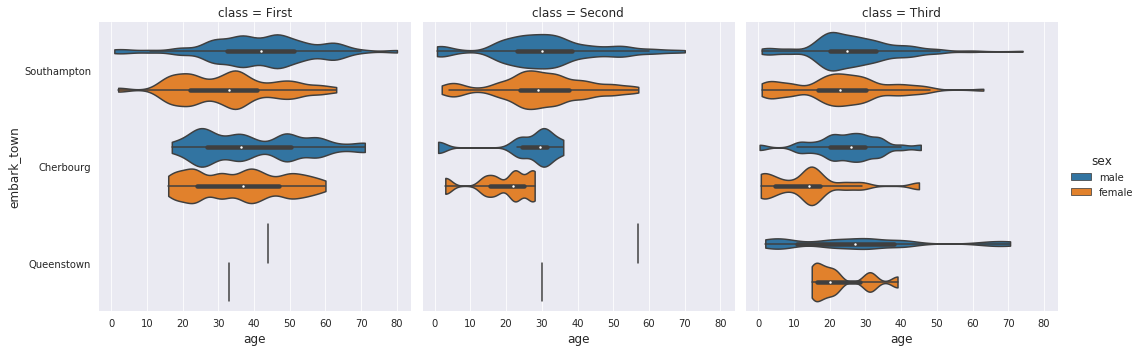

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_style('darkgrid')

titanic = sns.load_dataset("titanic")

sns.catplot(x="age", y="embark_town",
            hue="sex", col="class",
            data=titanic[titanic.embark_town.notnull()],
            orient="h", height=5, aspect=1, palette="tab10",
            kind="violin", dodge=True, cut=0, bw=.2)
plt.show()

# 散布図（Scatter Plot）
**特徴**  
**2変数間の関係がわかる．**  

/usr/local/lib/python3.6/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


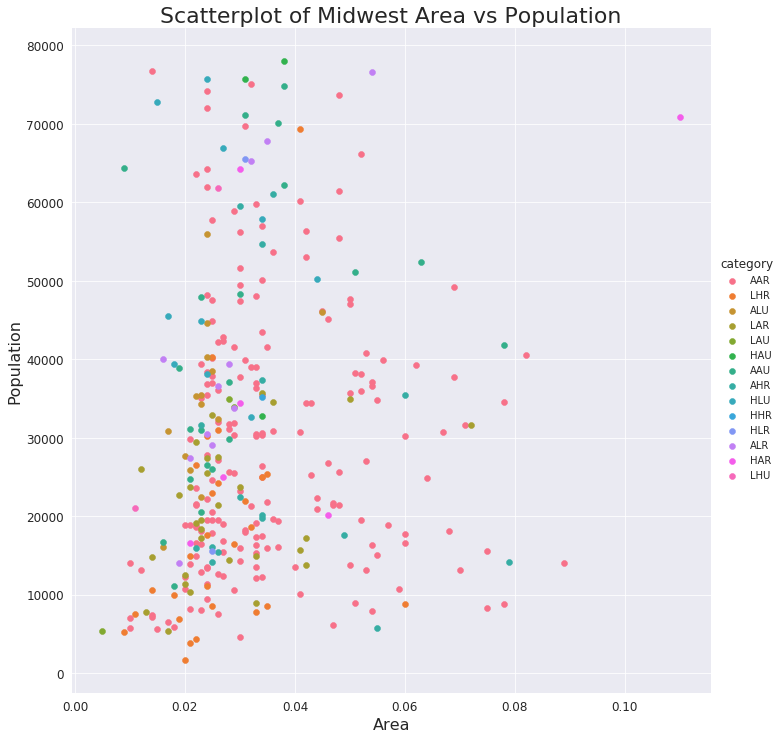

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_style('darkgrid')

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/midwest_filter.csv')

grid = sns.FacetGrid(df, hue='category', size=10)
grid.map(plt.scatter, 'area', 'poptotal')

grid.add_legend()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Area', fontsize=16)
plt.ylabel('Population', fontsize=16)
plt.title('Scatterplot of Midwest Area vs Population', fontsize=22)
plt.show()

注意点  
データ点があまりにも多いとよくわからないことになる．  
サブグループがあればサブプロットとして切り出してプロットするべき．  

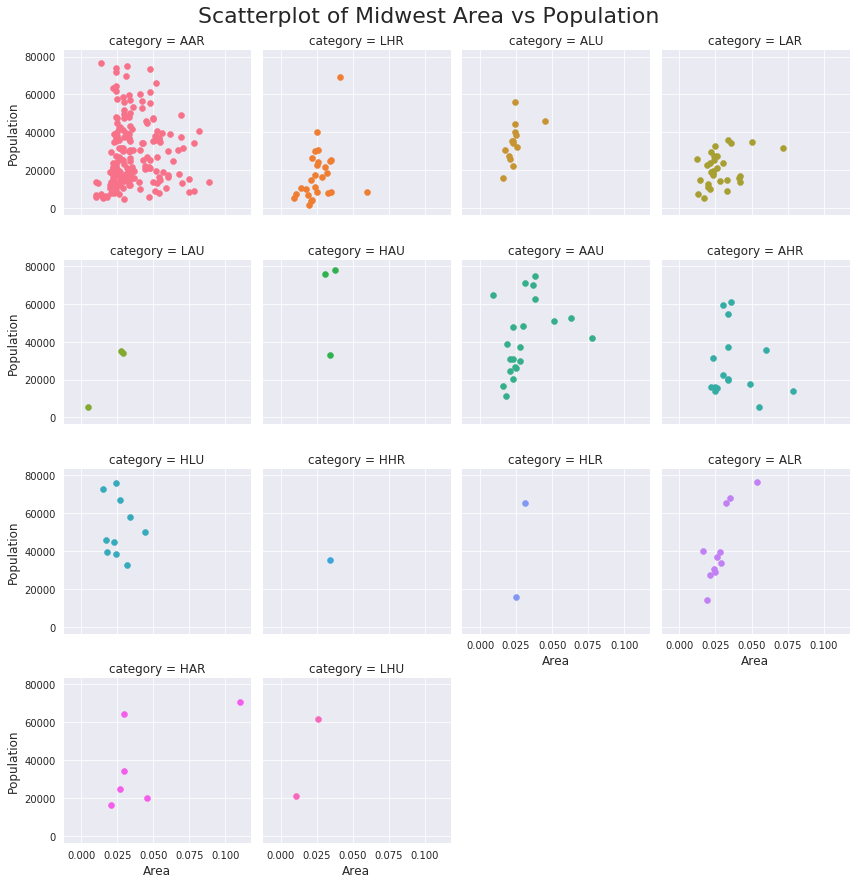

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_style('darkgrid')

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/midwest_filter.csv')

grid = sns.FacetGrid(df, col='category', hue='category', col_wrap=4, size=3)
grid.map(plt.scatter, 'area', 'poptotal')

grid.fig.suptitle('Scatterplot of Midwest Area vs Population', y=1.02, fontsize=22)
for ax in grid._bottom_axes:
    ax.set_xlabel('Area', fontsize=12)
for ax in grid._left_axes:
    ax.set_ylabel('Population', fontsize=12)

# クラスタ付き散布図（Scatter with Clusters）
**特徴**   
**凡例の色を変えるだけでなく，注目させたい部分を囲うとだいぶわかりやすくなる．**  

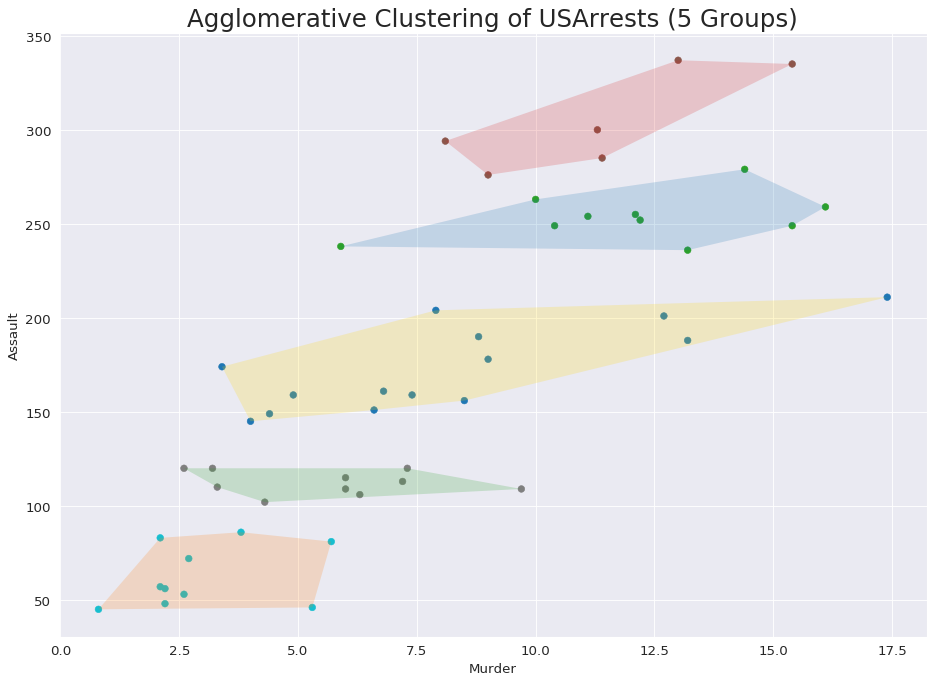

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial import ConvexHull

sns.set_style('darkgrid')

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/USArrests.csv')

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(df[['Murder', 'Assault', 'UrbanPop', 'Rape']])

plt.figure(figsize=(14, 10), dpi= 80)
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=cluster.labels_, cmap='tab10')

def encircle(x,y, ax=None, **kw):
    if not ax: ax=plt.gca()
    p = np.c_[x,y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices,:], **kw)
    ax.add_patch(poly)

encircle(df.loc[cluster.labels_ == 0, 'Murder'], df.loc[cluster.labels_ == 0, 'Assault'], ec="k", fc="gold", alpha=0.2, linewidth=0)
encircle(df.loc[cluster.labels_ == 1, 'Murder'], df.loc[cluster.labels_ == 1, 'Assault'], ec="k", fc="tab:blue", alpha=0.2, linewidth=0)
encircle(df.loc[cluster.labels_ == 2, 'Murder'], df.loc[cluster.labels_ == 2, 'Assault'], ec="k", fc="tab:red", alpha=0.2, linewidth=0)
encircle(df.loc[cluster.labels_ == 3, 'Murder'], df.loc[cluster.labels_ == 3, 'Assault'], ec="k", fc="tab:green", alpha=0.2, linewidth=0)
encircle(df.loc[cluster.labels_ == 4, 'Murder'], df.loc[cluster.labels_ == 4, 'Assault'], ec="k", fc="tab:orange", alpha=0.2, linewidth=0)

plt.xlabel('Murder'); plt.xticks(fontsize=12)
plt.ylabel('Assault'); plt.yticks(fontsize=12)
plt.title('Agglomerative Clustering of USArrests (5 Groups)', fontsize=22)
plt.show()

# 散布図+回帰（Scatter with Regression）
**特徴**  
**回帰直線を引くことで，単なる散布図以上にデータの傾向の違いを示すことができる．**  

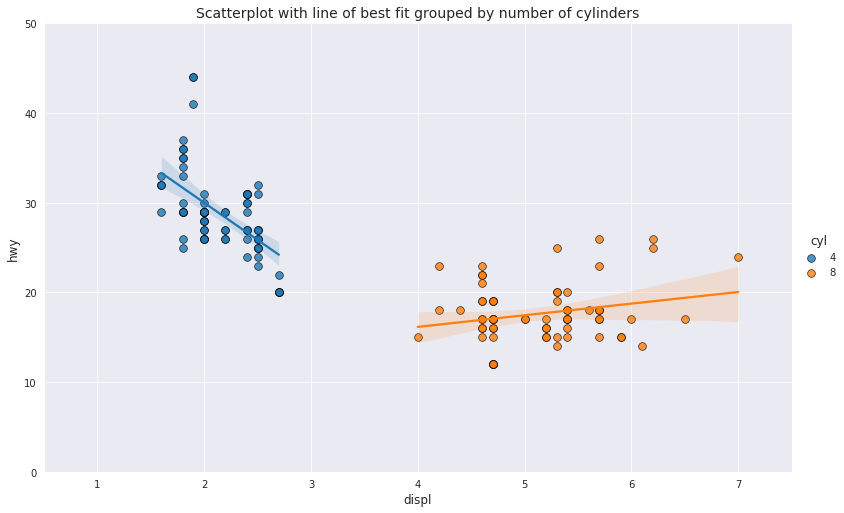

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_style('darkgrid')

df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")
df_select = df.loc[df.cyl.isin([4,8]), :]

grid = sns.lmplot(
    x='displ', y='hwy', data=df_select, hue='cyl',
    height=7,
    aspect=1.6,
    palette='tab10',
    scatter_kws=dict(s=60, linewidth=.7, edgecolors='black'))
grid.set(xlim=(0.5, 7.5), ylim=(0, 50))
plt.title("Scatterplot with line of best fit grouped by number of cylinders", fontsize=14)
plt.show()

# 散布図+分布（Scatter with Marginal Point）
**特徴**  
**データ点が多い場合には単なる散布図よりも有効．**  

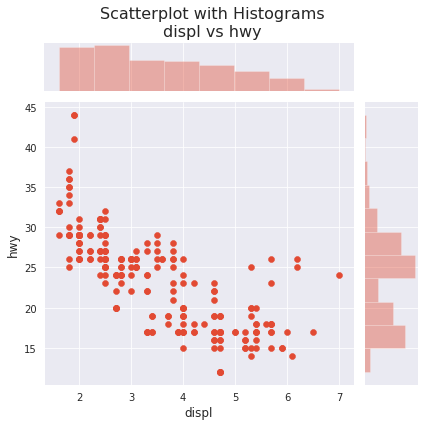

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_style('darkgrid')

df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")

sns.jointplot(x='displ', y='hwy', data=df)

plt.suptitle('Scatterplot with Histograms\ndispl vs hwy', fontsize=16)
plt.tight_layout(
    rect=[
        0, # left
        0, # bottom
        1, # right
        0.92 # top
    ]
)
plt.show()

# ダンベルチャート（Dumbbell Chart）
**特徴**  
**前後でどのくらいの差が存在するのかを伝えるのが得意．**  

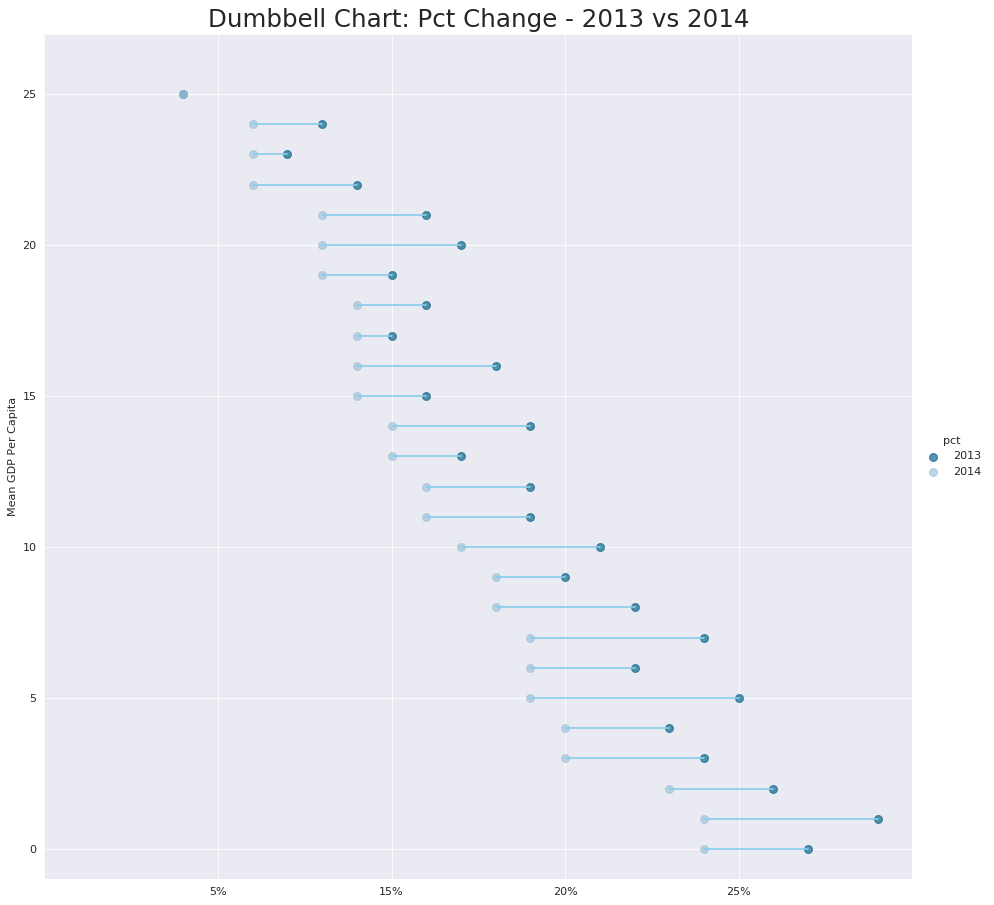

In [16]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import pandas as pd
import seaborn as sns

sns.set_style('darkgrid')

# Import Data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/health.csv")
df.sort_values('pct_2014', inplace=True)
df.reset_index(inplace=True)

# Func to draw line segment
def newline(p1, p2, color='black'):
    ax = plt.gca()
    l = mlines.Line2D([p1[0],p2[0]], [p1[1],p2[1]], color='skyblue')
    ax.add_line(l)
    return l

# Figure and Axes
fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True, figsize=(14,14), dpi=80)

# Points
ax.scatter(y=df['index'], x=df['pct_2013'], s=50, color='#0e668b', alpha=0.7, label='2013')
ax.scatter(y=df['index'], x=df['pct_2014'], s=50, color='#a3c4dc', alpha=0.7, label='2014')

# Line Segments
for i, p1, p2 in zip(df['index'], df['pct_2013'], df['pct_2014']):
    newline([p1, i], [p2, i])

# Decoration
ax.set_title("Dumbbell Chart: Pct Change - 2013 vs 2014", fontdict={'size':22})
ax.set(xlim=(0,.25), ylim=(-1, 27), ylabel='Mean GDP Per Capita')
ax.set_xticks([.05, .1, .15, .20])
ax.set_xticklabels(['5%', '15%', '20%', '25%'])
ax.legend(title='pct', loc='center left', bbox_to_anchor=(1, .5), facecolor='white', frameon=False)
plt.show()

# バブルプロット（Bubble Plot）
**特徴**  
**散布図と同様で2変数間の関係を扱える．**  

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

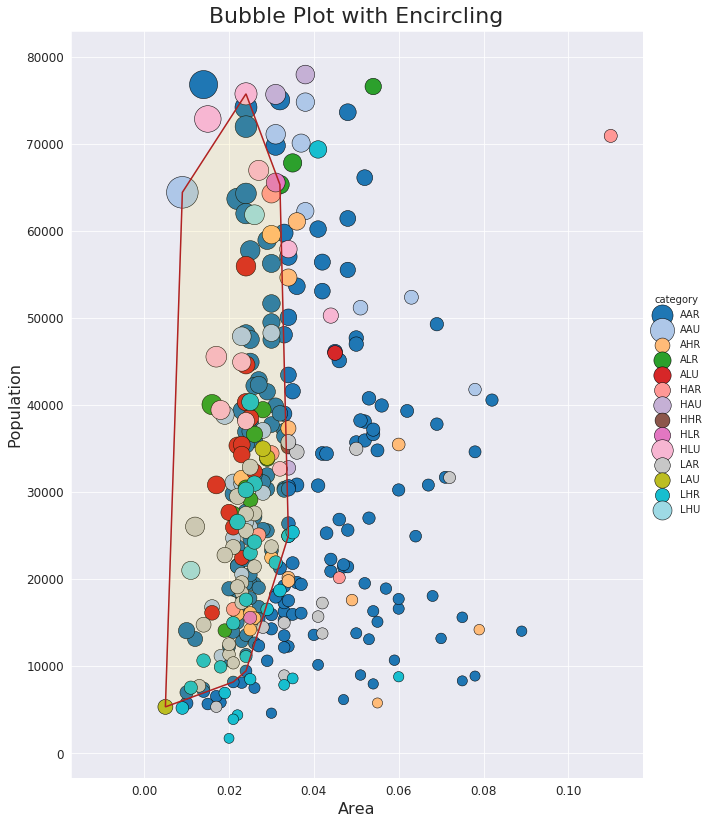

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.spatial import ConvexHull

sns.set_style('darkgrid')

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/midwest_filter.csv')

def encircle(x, y, ax=None, **kw):
    if not ax:
        ax = plt.gca()
    p = np.c_[x, y] # 行方向に連結
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices, :], **kw)
    ax.add_patch(poly)

categories = np.unique(df['category'])
colors = [plt.cm.tab20(i/float(len(categories)-1)) for i in range(len(categories))]
encircle_data = df.loc[df.state=='IN', :]

fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True, figsize=(10, 12))
for i, category in enumerate(categories):
    ax.scatter(
        'area', 'poptotal', data=df[df.category==category],
        s='dot_size',
        c=colors[i],
        label=str(category),
        edgecolors='black',
        linewidth=.5
    )

encircle(encircle_data.area, encircle_data.poptotal, ec='k', fc='gold', alpha=.1)
encircle(encircle_data.area, encircle_data.poptotal, ec='firebrick', fc='none', linewidth=1.5)

ax.legend(
    title='category',
    loc='center left',
    bbox_to_anchor=(1, .5),
    facecolor='white',
    frameon=False)
ax.set_xlabel('Area', fontsize=16)
ax.set_ylabel('Population', fontsize=16)
ax.tick_params(labelsize=12)
fig.suptitle('Bubble Plot with Encircling', fontsize=22)
fig.tight_layout(
    rect=[
        0, # left
        0.03, # bottom
        1, # right
        0.965 # top
    ]
)
fig.show()

注意点  
バブルプロットの場合は各バブルがどのくらいの大きさを表しているのかを示すべき.  
散布図同様に要素が多い場合は別にプロットすべき．  

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

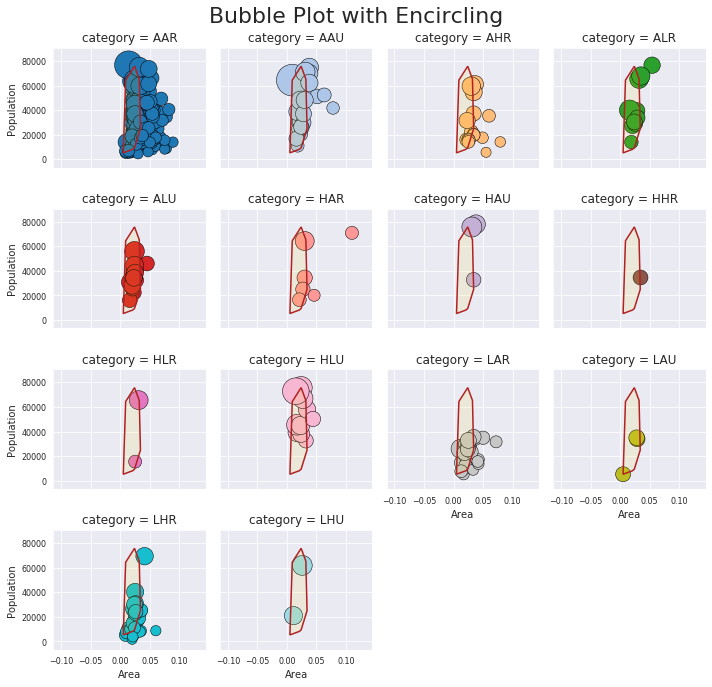

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.spatial import ConvexHull

sns.set_style('darkgrid')

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/midwest_filter.csv')

categories = np.unique(df['category'])
colors = [plt.cm.tab20(i/float(len(categories)-1)) for i in range(len(categories))]
encircle_data = df.loc[df.state=='IN', :]

def ceil_float(src, range):
    return ((src / range) + 1) * range

def ceil_int(src, range):
    return ((int)(src / range) + 1) * range

def encircle(x, y, ax=None, **kw):
    if not ax:
        ax = plt.gca()
    p = np.c_[x, y] # 行方向に連結
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices, :], **kw)
    ax.add_patch(poly)

area_min, area_max = 0, ceil_float(df['area'].max(), 0.001)
poptotal_min, poptotal_max = 0, ceil_int(df['poptotal'].max(), 10000)
xticks = np.arange(0, area_max+0.01, area_max/4)
yticks = np.arange(0, poptotal_max+1, poptotal_max/4)

nr, nc = 4, 4
fig, ax = plt.subplots(nrows=nr, ncols=nc, sharex=True, sharey=True, figsize=(10, 10))
x, y = 0, 0
for i, category in enumerate(categories):
    x = x + 1 if i > 0 and i % nc == 0 else x
    y = i % nc

    ax[x, y].set_xticks(xticks, minor=True)
    ax[x, y].set_yticks(yticks, minor=True)
    ax[x, y].tick_params(labelsize=8)
    ax[x, y].set_title('category = ' + category)

    if i >= len(categories) - nc:
        ax[x, y].tick_params(labelbottom=True)
        ax[x, y].set_xlabel('Area', fontsize=10)
    if y==0:
        ax[x, y].set_ylabel('Population', fontsize=10)

    ax[x, y].scatter(
        'area', 'poptotal', data=df[df.category==category],
        s='dot_size',
        c=colors[i],
        label=str(category),
        edgecolors='black',
        linewidth=.5
    )
    encircle(encircle_data.area, encircle_data.poptotal, ax=ax[x, y], ec='k', fc='gold', alpha=.1)
    encircle(encircle_data.area, encircle_data.poptotal, ax=ax[x, y], ec='firebrick', fc='none', linewidth=1.5)

if i < nr * nc:
    for i in range(i+1, nr*nc):
        x = x + 1 if i > 0 and i % nc == 0 else x
        y = i % nc

        fig.delaxes(ax[x, y])

fig.suptitle('Bubble Plot with Encircling', fontsize=22)
fig.tight_layout(
    rect=[
        0, # left
        0.03, # bottom
        1, # right
        0.96 # top
    ]
)
fig.show()

# ジッタープロット（Jitter Plot）
**特徴**  
**散布図と同様に2変数間の関係を扱える．**  
**ただ，同じ座標の点が重ならないように微妙にずらしてプロットする．**  

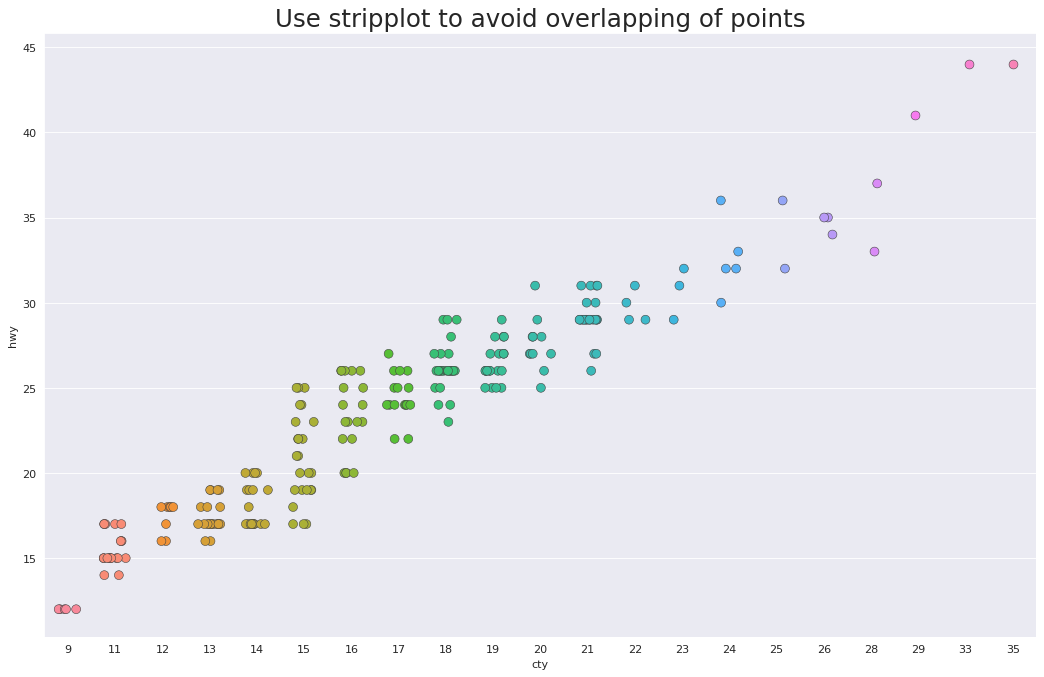

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_style('darkgrid')

df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")

fig, ax = plt.subplots(figsize=(16, 10), dpi=80)
sns.stripplot(x=df.cty, y=df.hwy, jitter=0.25, size=8, ax=ax, linewidth=.5)

plt.title('Use stripplot to avoid overlapping of points', fontsize=22)
plt.show()

# カウントプロット（Count Plot）
**特徴**  
**散布図と同様で2変数間の関係を扱える．**  
**同じ点が複数存在する場合は円が大きくなる．**  

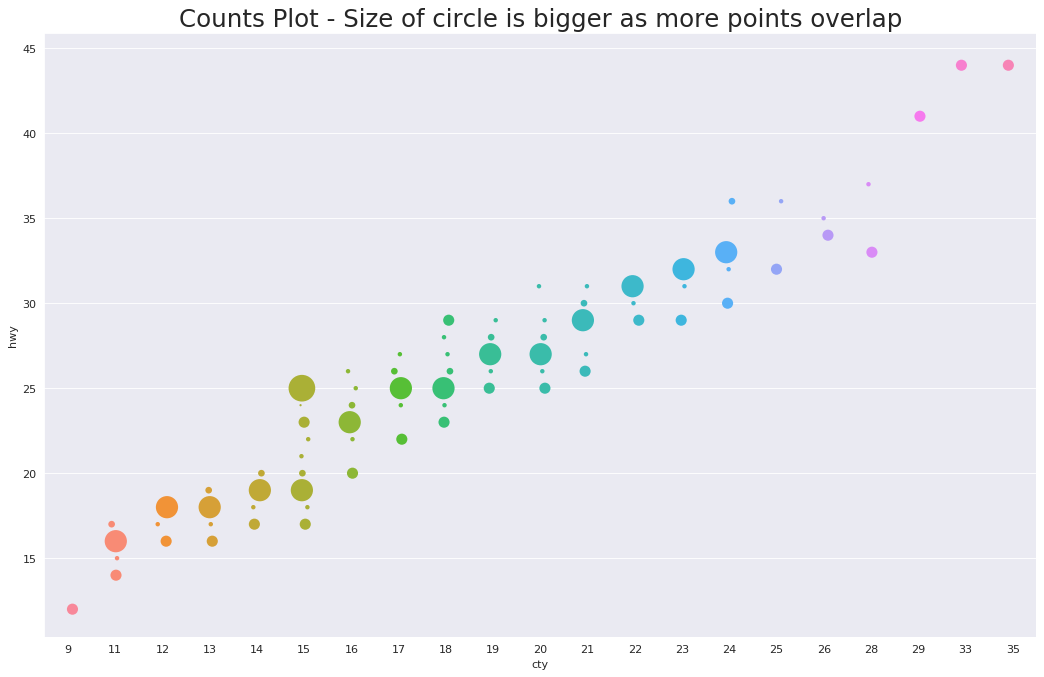

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_style('darkgrid')

df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")
df_counts = df.groupby(['hwy', 'cty']).size().reset_index(name='counts')

fig, ax = plt.subplots(figsize=(16, 10), dpi=80)
sns.stripplot(df_counts.cty, df_counts.hwy, size=df_counts.counts*2, ax=ax)

plt.title('Counts Plot - Size of circle is bigger as more points overlap', fontsize=22)
plt.show()

# レーダーチャート（Spider Plot）
**特徴**  
**特定の項目に偏りがあるかどうかを表現できる．**  
注意点  
複数のグループをプロットする場合はサブプロットを使用するべき．  
スケールが違う項目を利用する場合は，最低でもスケールの数字を示すこと．  
円形の図は見づらいので棒グラフにしたほうが良い．  
項目の並びによってだいぶ印象が変わる．  
数値の変化の割にプロットが大きく変化するため変化を過大評価しがち．  

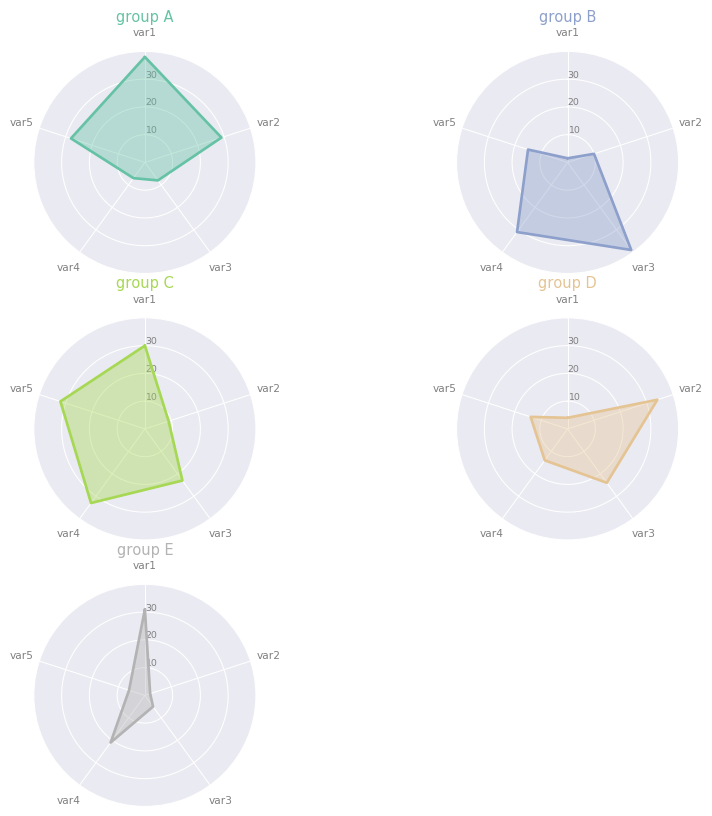

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
from math import pi

sns.set_style('darkgrid')

df = pd.DataFrame({
'group': ['A','B','C','D','E'],
'var1': [38, 1.5, 30, 4, 31],
'var2': [29, 10, 9, 34, 2],
'var3': [8, 39, 23, 24, 5],
'var4': [7, 31, 33, 14, 21],
'var5': [28, 15, 32, 14, 6]
})

def make_spider(nrows, ncols, index, color, label=None, title=None, ax=None):
    categories=list(df)[1:]
    N = len(categories)

    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    if ax == None:
        ax = plt.subplot(nrows, ncols, index+1, polar=True)

    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    plt.xticks(angles[:-1], categories, color='grey', size=8)

    ax.set_rlabel_position(0)
    plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
    plt.ylim(0,40)

    values=df.loc[row].drop('group').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid', label=label)
    ax.fill(angles, values, color=color, alpha=0.4)

    if title:
        plt.title(title, size=11, color=color, y=1.1)

my_dpi=96
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)

my_palette = plt.cm.get_cmap("Set2", len(df.index))

nr, nc = 3, 2
for row in range(0, len(df.index)):
    make_spider(nr, nc, row, title='group '+df['group'][row], color=my_palette(row))
plt.show()

# ヒートマップ（Heatmap）
**特徴**  
**項目ごとに数の大小関係がわかる．**  
注意点  
大抵の場合，正規化する必要あり  
クラスタ分析で似たクラスタを固めて並べるとインサイトを得やすい．  
配色が大事．  

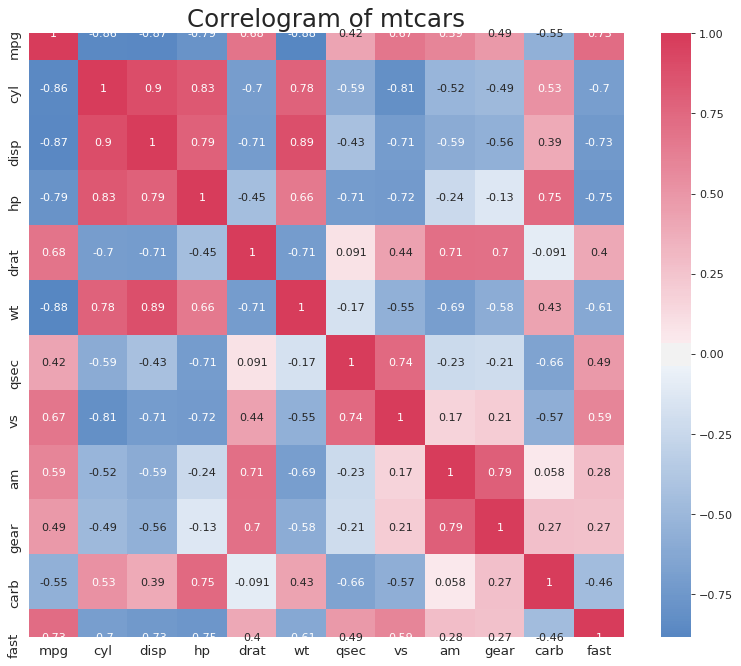

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_style('darkgrid')

df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")

plt.figure(figsize=(12,10), dpi=80)
sns.heatmap(
    df.corr(),
    xticklabels=df.corr().columns,
    yticklabels=df.corr().columns,
    cmap=sns.diverging_palette(250, 5, as_cmap=True),
    center=0,
    annot=True,
    linecolor='white')

plt.title('Correlogram of mtcars', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()